In [1]:
from random import random, randrange
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
転移温度 2.2691

In [147]:
#交換法

#ランダムな初期状態生成
Nx = 20
Ny = 20
s = np.random.randint(0,2,(Nx,20))
def Initial_rand(s, Nx, Ny):
    for i in range(Nx):
        for j in range(Ny):
            if s[i,j] == 0:
                s[i,j] = -1
    return s



def each_Ecalc(s, Nx, Ny):
    dum = 0
    
    #右側のスピンとの相互作用
    for i in range(0, Nx):
        for j in range(0, Ny):
            
            migi = i + 1
            
            if migi == Nx:
                migi = 0
            dum += s[i,j]*s[migi,j]
    
    #上側のスピンとの相互作用
    for i in range(0, Nx):
        for j in range(0,Ny):
            
            ue = j+1
            
            if ue == Ny:
                ue = 0
            
            dum += s[i,j]*s[i,ue]
            
    return dum

#レプリカ全ての重み付きエネルギー和、要らなかった...
def total_Ecalc(repulica_list, KBT_array):
    energy_list = []
    for i in range(len(repulica_list)):
        energy_list.append(each_Ecalc(repulica_list[i],Nx,Ny))
        
    energy_array = np.array(energy_list)  #ndarrayに変換
    
    total_E = np.sum(energy_array/KBT_array)
    return total_E

#スピンフリップによる状態更新
def spin_update(repulica_list, KBT_array, energy_list):
    for t in range(len(repulica_list)):
        s = repulica_list[t]
        i = randrange(Nx)
        j = randrange(Ny)

        s_trial = s.copy()   #deep copyに相当
        s_trial[i,j] = -1*s[i,j]
        if i+1 != Nx and j+1 != Ny:
            delta_E = 2*s_trial[i,j]*(-1*J)*(s[i+1,j]+s[i-1,j]+s[i,j+1]+s[i,j-1])-B*(s_trial[i,j]-s[i,j])
        elif i+1 == Nx and j+1 != Ny:
            delta_E = 2*s_trial[i,j]*(-1*J)*(s[0,j]+s[i-1,j]+s[i,j+1]+s[i,j-1])-B*(s_trial[i,j]-s[i,j])
        elif i+1 != Nx and j+1 == Ny:
            delta_E = 2*s_trial[i,j]*(-1*J)*(s[i+1,j]+s[i-1,j]+s[i,0]+s[i,j-1])-B*(s_trial[i,j]-s[i,j])
        elif i+1 == Nx and j+1 == Ny:
            delta_E = 2*s_trial[i,j]*(-1*J)*(s[0,j]+s[i-1,j]+s[i,0]+s[i,j-1])-B*(s_trial[i,j]-s[i,j])
            
        #メトロポリス法による状態更新
        if delta_E < 0:
            repulica_list[t] = s_trial
            energy_list[t] = energy_list[t] + delta_E
        else:
            if random() < np.exp(-delta_E/KBT_array[t]):
                repulica_list[t] = s_trial
                energy_list[t] = energy_list[t] + delta_E
        
    return (repulica_list, energy_list)

#レプリカ間の交換1
def repulica_exchange_even(repulica_list, KBT_array, energy_list):
    for j in range(int(n/2)):       
        i = 2*j
        delta_ = (KBT_array[i+1]**(-1)-KBT_array[i]**(-1))*(energy_list[i] - energy_list[i+1])
        
        if delta_ < 0:
            x = repulica_list[i]
            repulica_list[i] = repulica_list[i+1]
            repulica_list[i+1] = x
            
            y = energy_list[i]
            energy_list[i] = energy_list[i+1]
            energy_list[i+1] = y
        else:
            if random() < np.exp(-delta_):
                x = repulica_list[i]
                repulica_list[i] = repulica_list[i+1]
                repulica_list[i+1] = x
                
                y = energy_list[i]
                energy_list[i] = energy_list[i+1]
                energy_list[i+1] = y
                
    return  (repulica_list, energy_list)

#レプリカ間の交換2
def repulica_exchange_odd(repulica_list, KBT_array, energy_list):
    for j in range(int(n/2)-1):     
        i = 2*j + 1
        delta_ = (KBT_array[i+1]**(-1)-KBT_array[i]**(-1))*(energy_list[i] - energy_list[i+1])
        
        if delta_ < 0:
            x = repulica_list[i]
            repulica_list[i] = repulica_list[i+1]
            repulica_list[i+1] = x
            
            y = energy_list[i]
            energy_list[i] = energy_list[i+1]
            energy_list[i+1] = y
        else:
            if random() < np.exp(-delta_):
                x = repulica_list[i]
                repulica_list[i] = repulica_list[i+1]
                repulica_list[i+1] = x
                
                y = energy_list[i]
                energy_list[i] = energy_list[i+1]
                energy_list[i+1] = y
                
    return  (repulica_list, energy_list)

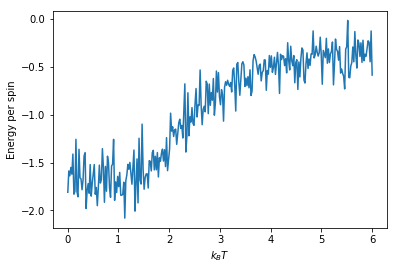

In [74]:
#交換なしで並列計算してみる。
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 40000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#MCMC
for i in range(steps):
    repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
    energy_array[:,i+1] = energy_list

ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

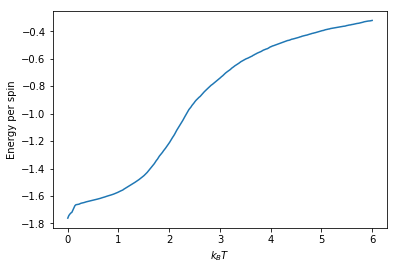

In [98]:
#温度間の交換を入れてみる。
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 10000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [99]:
print(ETplot[0])

-1.760935


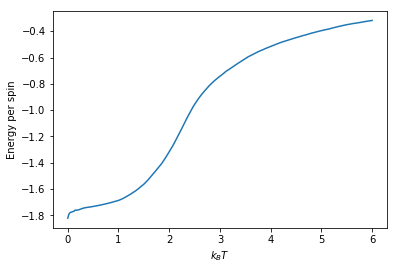

In [96]:
#温度間の交換を入れてみる。
#40000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 40000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [97]:
print(ETplot[0])

-1.82


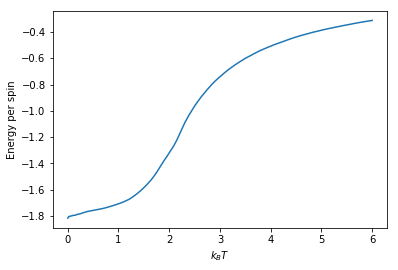

In [100]:
#温度間の交換を入れてみる。
#60000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 60000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [101]:
print(ETplot[0])

-1.816705


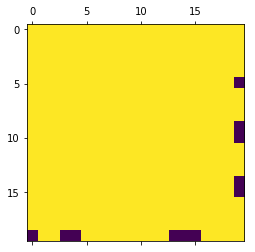

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])

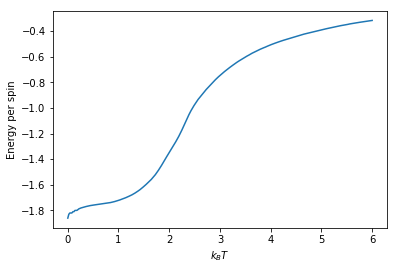

In [107]:
#温度間の交換を入れてみる。
#100000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 100000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

5分かかった。

In [108]:
print(ETplot[0])

-1.86


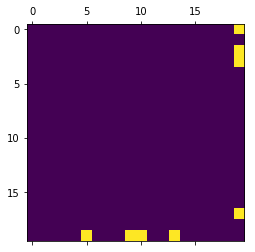

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])

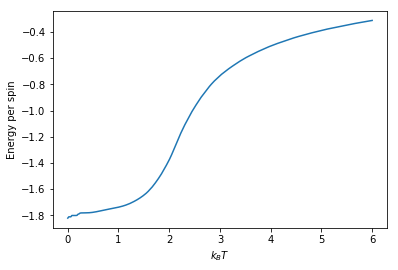

In [110]:
#温度間の交換を入れてみる。
#200000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 200000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 300 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [111]:
print(ETplot[0])

-1.82


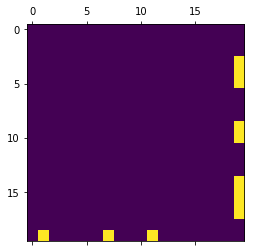

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])

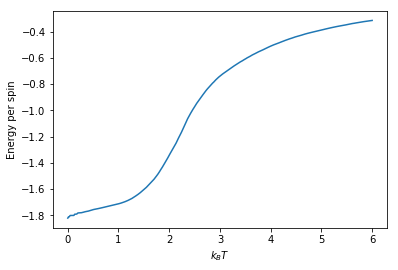

In [113]:
#温度間の交換を入れてみる。
#レプリカ数を増やしてみる。
#60000ステップ
#レプリカ400個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 60000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 400 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [114]:
print(ETplot[0])

-1.82


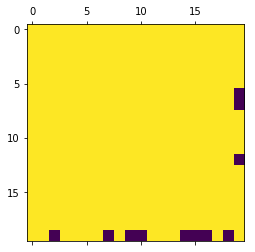

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])

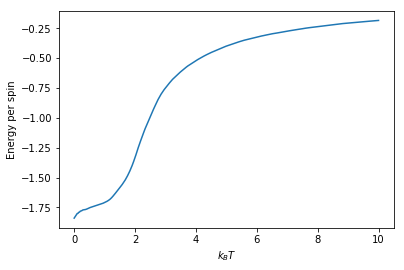

In [116]:
#温度間の交換を入れてみる。
#温度幅を拡げてみる。
#60000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 60000 #MCステップ
avsteps = int(steps/5) #最後のsteps/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 400 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 10, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for i in range(steps):
    if i % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
    if i % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

In [117]:
print(ETplot[0])

-1.84


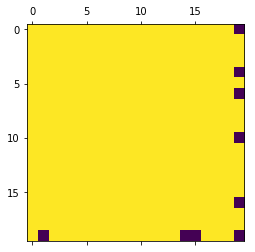

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])

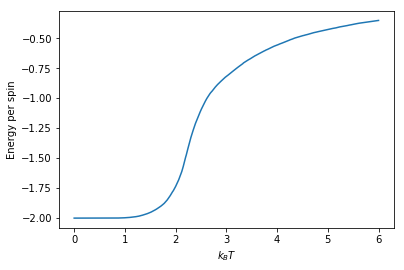

In [150]:
#端の状態更新のバグを除去
#60000ステップ
#レプリカ300個
Nx = 20
Ny = 20
Ntot = Nx*Ny
J = 1 #交換相互作用
B = 0.0 #外部磁場
steps = 60000 #MCステップ、1ステップにつき、スピン更新とレプリカ交換が含まれている。
avsteps = int(2*steps/5) #最後のsteps*2/5回分だけを採用し、その前はバーンイン

repulica_list = []
n = 400 #偶数
for i in range(n):
    repulica_list.append(Initial_rand(np.random.randint(0,2,(20,20)),Nx,Ny))
    
KBT_array = np.linspace(0.001, 6, n) #温度を0.001から6までn刻みで変動させる

#初期エネルギー計算
energy_list = []
for i in range(len(repulica_list)):
    energy_list.append(-J*each_Ecalc(repulica_list[i],Nx,Ny))
    
energy_array = np.zeros((n,2*steps+1))

energy_array[:,0] = energy_list
    


#Exchange MC
for j in range(steps):
    i = j * 2
    if j % 2 == 1:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_odd(repulica_list, KBT_array, energy_list)
        energy_array[:,i+2] = energy_list
    if j % 2 == 0:
        #まずスピンフリップ
        repulica_list, energy_list = spin_update(repulica_list, KBT_array, energy_list)
        energy_array[:,i+1] = energy_list
        
        #次に温度交換
        repulica_list, energy_list = repulica_exchange_even(repulica_list, KBT_array, energy_list)
        energy_array[:,i+2] = energy_list
        
ETplot = []
for i in range(n):
    ETplot.append((np.sum(energy_array[i, -avsteps:])/avsteps)/Ntot)

plt.plot(KBT_array, ETplot)
plt.ylabel("Energy per spin")
plt.xlabel("$k_{B}T$")
plt.show()

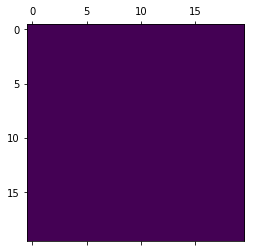

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(repulica_list[0])